COMPLETE REPORT:

In [2]:
import pandas as pd
import numpy as np
# Specify the path to your CSV file
csv_file = "C:/Users/nachi/Desktop/CAPSTONE/nutrition_data/nutrition.csv"

# Load the CSV file
df = pd.read_csv(csv_file)

print(df.head())


   Index             name  serving_size_grams  calories  total_fat_grams  \
0      0       Cornstarch                 100       381              0.1   
1      1     Nuts, pecans                 100       691             72.0   
2      2    Eggplant, raw                 100        25              0.2   
3      3   Teff, uncooked                 100       367              2.4   
4      4  Sherbet, orange                 100       144              2.0   

   saturated_fat_grams  cholesterol_mg  sodium_mg  choline_mg  folate_mcg  \
0                  0.0               0          9         0.4           0   
1                  6.2               0          0        40.5          22   
2                  0.0               0          2         6.9          22   
3                  0.4               0         12        13.1           0   
4                  1.2               1         46         7.7           4   

   ...  saturated_fatty_acids_g  monounsaturated_fatty_acids_g  \
0  ...        

In [3]:
print(df.shape)

(8789, 78)


In [4]:
#Keep nly the first word from category columns
df['Category'] = df['Category'].str.split().str[0]

In [5]:
top_ten_common = df['Category'].value_counts().head(10)

print("\nTop ten most common elements in 'Category' column:")
print(top_ten_common)


Top ten most common elements in 'Category' column:
Category
BEEF          967
CEREALS       354
PORK          336
LAMB          295
BEVERAGES     282
BABYFOOD      243
FISH          238
CHICKEN       214
SOUP          176
CAMPBELL'S    156
Name: count, dtype: int64


In [6]:
table = df.dtypes.to_frame().reset_index()
table.columns = ['Column Name', 'Data Type']

print(table.to_string(index=False))

                  Column Name Data Type
                        Index     int64
                         name    object
           serving_size_grams     int64
                     calories     int64
              total_fat_grams   float64
          saturated_fat_grams   float64
               cholesterol_mg     int64
                    sodium_mg     int64
                   choline_mg   float64
                   folate_mcg     int64
               folic_acid_mcg     int64
                    niacin_mg   float64
          pantothenic_acid_mg   float64
                riboflavin_mg   float64
                   thiamin_mg   float64
                 vitamin_a_IU     int64
            vitamin_a_rae_mcg     int64
           carotene_alpha_mcg     int64
            carotene_beta_mcg     int64
       cryptoxanthin_beta_mcg     int64
        lutein_zeaxanthin_mcg     int64
                 lucopene_mcg     int64
              vitamin_b12_mcg   float64
                vitamin_b6_mg   float64


In [7]:
calories_description = df['calories'].describe()

print(calories_description)

count    8789.000000
mean      226.283878
std       169.862001
min         0.000000
25%        91.000000
50%       191.000000
75%       337.000000
max       902.000000
Name: calories, dtype: float64


In [8]:
# Get a list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Display description for numerical columns in chunks
for i in range(0, len(numerical_columns), 10):  # Change 10 to desired chunk size
    subset = numerical_columns[i:i+10]
    print(df[subset].describe())


             Index  serving_size_grams     calories  total_fat_grams  \
count  8789.000000              8789.0  8789.000000      8789.000000   
mean   4394.000000               100.0   226.283878        10.556855   
std    2537.310091                 0.0   169.862001        15.818247   
min       0.000000               100.0     0.000000         0.000000   
25%    2197.000000               100.0    91.000000         1.000000   
50%    4394.000000               100.0   191.000000         5.100000   
75%    6591.000000               100.0   337.000000        14.000000   
max    8788.000000               100.0   902.000000       100.000000   

       saturated_fat_grams  cholesterol_mg     sodium_mg   choline_mg  \
count          8789.000000     8789.000000   8789.000000  8789.000000   
mean              3.434281       38.723063    306.353851    23.681249   
std               6.429758      117.358944    939.220468    51.332265   
min               0.000000        0.000000      0.000000   

In [9]:
# Iterate over each column
for col in df.columns:
    non_zero_count = (df[col] != 0).sum()
    print(f"Column '{col}' has {non_zero_count} non-zero values out of {len(df)} samples.")

Column 'Index' has 8788 non-zero values out of 8789 samples.
Column 'name' has 8789 non-zero values out of 8789 samples.
Column 'serving_size_grams' has 8789 non-zero values out of 8789 samples.
Column 'calories' has 8750 non-zero values out of 8789 samples.
Column 'total_fat_grams' has 8338 non-zero values out of 8789 samples.
Column 'saturated_fat_grams' has 7199 non-zero values out of 8789 samples.
Column 'cholesterol_mg' has 4710 non-zero values out of 8789 samples.
Column 'sodium_mg' has 8434 non-zero values out of 8789 samples.
Column 'choline_mg' has 4606 non-zero values out of 8789 samples.
Column 'folate_mcg' has 6893 non-zero values out of 8789 samples.
Column 'folic_acid_mcg' has 1183 non-zero values out of 8789 samples.
Column 'niacin_mg' has 7862 non-zero values out of 8789 samples.
Column 'pantothenic_acid_mg' has 6292 non-zero values out of 8789 samples.
Column 'riboflavin_mg' has 7838 non-zero values out of 8789 samples.
Column 'thiamin_mg' has 7799 non-zero values out 

### Removing columns that are not required

Considering variation in columns numerically and the number of empty rows.

1.	Index
2.	saturated_fat_grams
3.	serving_size_grams
4.	choline_mg
5.	folic_acid_mcg
6.	niacin_mg
7.	pantothenic_acid_mg
8.	riboflavin_mg
9.	thiamin_mg
10.	vitamin_a_rae_mcg
11.	carotene_alpha_mcg
12.	carotene_beta_mcg
13.	cryptoxanthin_beta_mcg
14.	lutein_zeaxanthin_mcg
15.	lucopene_mcg
16.	tocopherol_alpha_mg
17.	copper_mg 
18.	manganese_mg
19.	alanine_g
20.	arginine_g
21.	aspartic_acid_g
22.	cystine_g 
23.	glutamic_acid_g
24.	glycine_g
25.	histidine_g
26.	hydroxyproline_g
27.	isoleucine_g
28.	leucine_g
29.	lysine_g
30.	methionine_g
31.	phenylalanine_g
32.	proline_g	
33.	serine_g	
34.	threonine_g	
35.	tryptophan_g	
36.	tyrosine_g	
37.	valine_g
38.	fructose_g	
39.	galactose_g	
40.	glucose_g	
41.	lactose_g	
42.	maltose_g	
43.	sucrose_g
44.	fat_g 
45.	fatty_acids_total_trans_mg
46.	alcohol_g
47.	ash_g
48.	caffeine_mg	
49.	theobromine_mg


### Columns Considered for further analysis:

In [10]:
df_final = df

In [11]:


columns_to_remove = [
    'saturated_fat_grams', 'serving_size_grams', 'choline_mg', 'folic_acid_mcg', 'niacin_mg', 
    'pantothenic_acid_mg', 'riboflavin_mg', 'thiamin_mg', 'vitamin_a_rae_mcg', 'carotene_alpha_mcg', 
    'carotene_beta_mcg', 'cryptoxanthin_beta_mcg', 'lutein_zeaxanthin_mcg', 'lucopene_mcg', 
    'tocopherol_alpha_mg', 'copper_mg', 'manganese_mg', 'alanine_g', 'arginine_g', 'aspartic_acid_g', 
    'cystine_g', 'glutamic_acid_g', 'glycine_g', 'histidine_g', 'hydroxyproline_g', 'isoleucine_g', 
    'leucine_g', 'lysine_g', 'methionine_g', 'phenylalanine_g', 'proline_g', 'serine_g', 'threonine_g', 
    'tryptophan_g', 'tyrosine_g', 'valine_g', 'fructose_g', 'galactose_g', 'glucose_g', 'lactose_g', 
    'maltose_g', 'sucrose_g', 'fat_g', 'fatty_acids_total_trans_mg', 'alcohol_g', 'ash_g', 'caffeine_mg', 
    'theobromine_mg','Index','folate_mcg'
]

df_final = df_final.drop(columns=columns_to_remove)


In [12]:
df_final.head()

,name,calories,total_fat_grams,cholesterol_mg,sodium_mg,vitamin_a_IU,vitamin_b12_mcg,vitamin_b6_mg,vitamin_c_mg,vitamin_d_IU,...,zinc_mg,protein_g,carbohydrate_g,fiber_g,sugars_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,water_g,Category
0,Cornstarch,381,0.1,0,9,0,0.00,0.000,0.0,0,...,0.06,0.26,91.27,0.9,0.00,0.009,0.016,0.025,8.32,CORNSTARCH
1,"Nuts, pecans",691,72.0,0,0,56,0.00,0.210,1.1,0,...,4.53,9.17,13.86,9.6,3.97,6.180,40.801,21.614,3.52,NUTS
2,"Eggplant, raw",25,0.2,0,2,23,0.00,0.084,2.2,0,...,0.16,0.98,5.88,3.0,3.53,0.034,0.016,0.076,92.30,EGGPLANT
3,"Teff, uncooked",367,2.4,0,12,9,0.00,0.482,0.0,0,...,3.63,13.30,73.13,8.0,1.84,0.449,0.589,1.071,8.82,TEFF
4,"Sherbet, orange",144,2.0,1,46,46,0.13,0.023,2.3,0,...,0.48,1.10,30.40,1.3,24.32,1.160,0.530,0.080,66.10,SHERBET


In [13]:
df_final.columns

Index(['name', 'calories', 'total_fat_grams', 'cholesterol_mg', 'sodium_mg',
       'vitamin_a_IU', 'vitamin_b12_mcg', 'vitamin_b6_mg', 'vitamin_c_mg',
       'vitamin_d_IU', 'vitamin_e_mg', 'vitamin_k_mcg', 'calcium_mg',
       'iron_mg', 'magnesium_mg', 'phosphorous_mg', 'potassium_mg',
       'selenium_mcg', 'zinc_mg', 'protein_g', 'carbohydrate_g', 'fiber_g',
       'sugars_g', 'saturated_fatty_acids_g', 'monounsaturated_fatty_acids_g',
       'polyunsaturated_fatty_acids_g', 'water_g', 'Category'],
      dtype='object')

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           8789 non-null   object 
 1   calories                       8789 non-null   int64  
 2   total_fat_grams                8789 non-null   float64
 3   cholesterol_mg                 8789 non-null   int64  
 4   sodium_mg                      8789 non-null   int64  
 5   vitamin_a_IU                   8789 non-null   int64  
 6   vitamin_b12_mcg                8789 non-null   float64
 7   vitamin_b6_mg                  8789 non-null   float64
 8   vitamin_c_mg                   8789 non-null   float64
 9   vitamin_d_IU                   8789 non-null   int64  
 10  vitamin_e_mg                   8789 non-null   float64
 11  vitamin_k_mcg                  8789 non-null   float64
 12  calcium_mg                     8789 non-null   i

In [15]:
categorical = ['name','Category']
df_numeric = df_final.drop(columns=categorical)

In [16]:
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
calories,8789.0,226.283878,169.862001,0.0,91.000,191.000,337.000,902.000
total_fat_grams,8789.0,10.556855,15.818247,0.0,1.000,5.100,14.000,100.000
cholesterol_mg,8789.0,38.723063,117.358944,0.0,0.000,2.000,65.000,3100.000
sodium_mg,8789.0,306.353851,939.220468,0.0,36.000,84.000,396.000,38758.000
vitamin_a_IU,8789.0,676.320514,3694.739553,0.0,0.000,20.000,208.000,100000.000
vitamin_b12_mcg,8789.0,1.201716,4.271908,0.0,0.000,0.070,1.270,98.890
vitamin_b6_mg,8789.0,0.261324,0.467713,0.0,0.035,0.119,0.357,12.000
vitamin_c_mg,8789.0,8.356548,65.624854,0.0,0.000,0.000,2.400,2732.000
vitamin_d_IU,8789.0,14.560815,123.643892,0.0,0.000,0.000,1.000,10000.000
vitamin_e_mg,8789.0,0.885576,3.813260,0.0,0.000,0.120,0.460,149.400


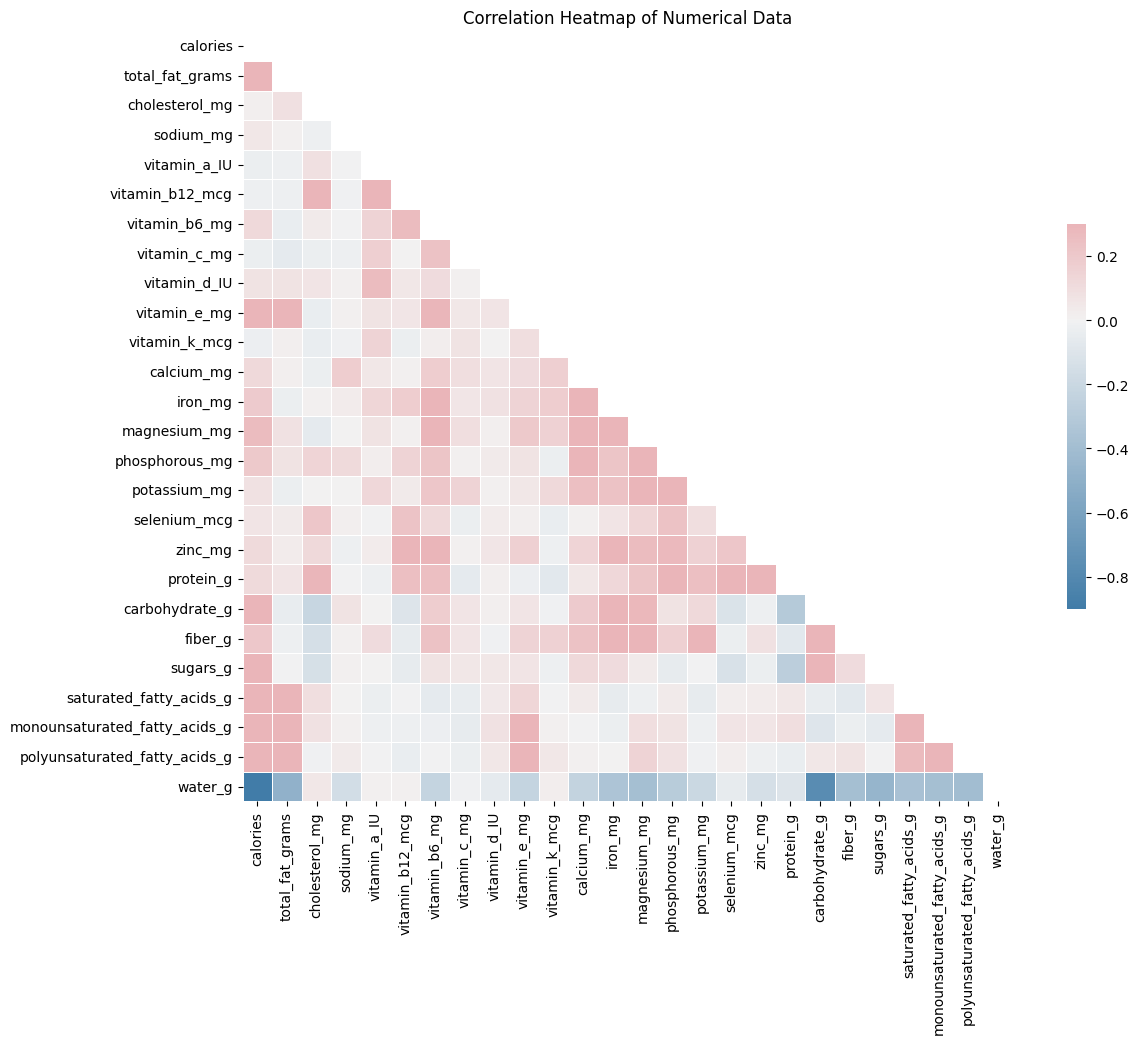

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Set up custom color palette
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Numerical Data')
plt.show()


### Lets remove the column water_g as it seems to have high correlation with certain columns

In [18]:
df_final = df_final.drop(columns=['water_g'])

In [19]:
print(corr)

                               calories  total_fat_grams  cholesterol_mg  \
calories                       1.000000         0.806574        0.015153   
total_fat_grams                0.806574         1.000000        0.087367   
cholesterol_mg                 0.015153         0.087367        1.000000   
sodium_mg                      0.055405         0.011999       -0.018300   
vitamin_a_IU                  -0.029758        -0.020500        0.085757   
vitamin_b12_mcg               -0.014267        -0.020698        0.322310   
vitamin_b6_mg                  0.118680        -0.041975        0.034698   
vitamin_c_mg                  -0.033269        -0.057288       -0.028347   
vitamin_d_IU                   0.074744         0.073238        0.064323   
vitamin_e_mg                   0.304744         0.341406       -0.037682   
vitamin_k_mcg                 -0.024088         0.015109       -0.042061   
calcium_mg                     0.124456         0.016747       -0.036795   
iron_mg     

### Generating Profile Report using Pandas Profile Reporting for further EDA

In [71]:
from ydata_profiling import ProfileReport
fprofile = ProfileReport(df_final, title="Nutrition Dataset Report", explorative=True)
fprofile.to_file("capstone_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# PCA

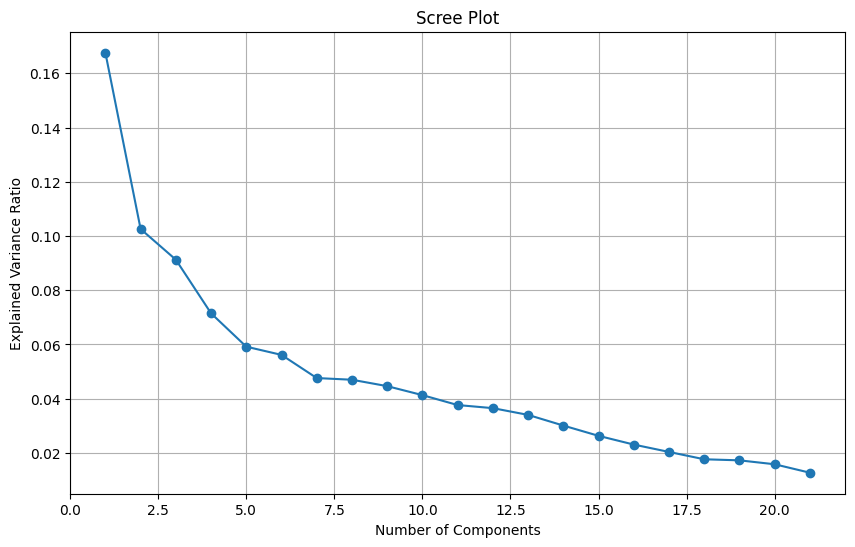

Number of components explaining 95% of variance: 18


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Exclude specified columns
excluded_columns = ['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'Category', 'name']
numerical_columns = [col for col in df_final.columns if col not in excluded_columns]

# Extract numerical data
numerical_data = df_final[numerical_columns]

# Standardize the numerical data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca.fit(numerical_data_scaled)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Determine number of components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
ideal_num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components explaining 95% of variance:", ideal_num_components)

# Re-fit PCA with ideal number of components
pca_final = PCA(n_components=ideal_num_components)
principal_components = pca_final.fit_transform(numerical_data_scaled)


In [22]:
# Print variance level of each component
print("Variance explained by each component:")
for i, variance in enumerate(pca_final.explained_variance_ratio_):
    print(f"Component {i+1}: {variance*100:.2f}%")

Variance explained by each component:
Component 1: 16.76%
Component 2: 10.26%
Component 3: 9.13%
Component 4: 7.15%
Component 5: 5.92%
Component 6: 5.61%
Component 7: 4.76%
Component 8: 4.70%
Component 9: 4.46%
Component 10: 4.13%
Component 11: 3.76%
Component 12: 3.65%
Component 13: 3.40%
Component 14: 3.01%
Component 15: 2.63%
Component 16: 2.31%
Component 17: 2.03%
Component 18: 1.76%


In [23]:
# Get the loadings of each principal component
loadings = pca_final.components_

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(loadings, columns=numerical_columns)

# Display the loadings for each principal component
for i in range(ideal_num_components):
    print(f"Principal Component {i+1} Loadings:")
    component_loadings = loadings_df.iloc[i]
    sorted_loadings = component_loadings.abs().sort_values(ascending=False)
    print(sorted_loadings)
    print("\n")


Principal Component 1 Loadings:
magnesium_mg                     0.389760
iron_mg                          0.359692
vitamin_b6_mg                    0.336209
phosphorous_mg                   0.327987
potassium_mg                     0.303834
calcium_mg                       0.301128
fiber_g                          0.290776
zinc_mg                          0.283368
vitamin_e_mg                     0.197493
vitamin_b12_mcg                  0.157774
vitamin_a_IU                     0.147489
selenium_mcg                     0.126455
vitamin_k_mcg                    0.116295
vitamin_c_mg                     0.107913
polyunsaturated_fatty_acids_g    0.087169
vitamin_d_IU                     0.079838
monounsaturated_fatty_acids_g    0.065886
sugars_g                         0.042962
sodium_mg                        0.040121
cholesterol_mg                   0.038851
saturated_fatty_acids_g          0.012910
Name: 0, dtype: float64


Principal Component 2 Loadings:
monounsaturated_fatty_acids_

Principal Component 1 (PC1):

High positive loadings: magnesium_mg, iron_mg, vitamin_b6_mg, phosphorous_mg, potassium_mg
These nutrients contribute most positively to PC1, suggesting that foods high in these nutrients will have higher PC1 scores.
Principal Component 2 (PC2):

High positive loadings: monounsaturated_fatty_acids_g, polyunsaturated_fatty_acids_g, saturated_fatty_acids_g
These fatty acids contribute most positively to PC2, indicating that foods high in these fatty acids will have higher PC2 scores.
Principal Component 3 (PC3):

High positive loadings: vitamin_b12_mcg, cholesterol_mg, selenium_mcg, fiber_g
These nutrients contribute most positively to PC3, suggesting that foods high in these nutrients will have higher PC3 scores.
Principal Component 4 (PC4):

High positive loadings: vitamin_a_IU, phosphorous_mg, selenium_mcg, vitamin_c_mg
These nutrients contribute most positively to PC4, indicating that foods high in these nutrients will have higher PC4 scores.
Principal Component 5 (PC5):

High positive loadings: vitamin_a_IU, zinc_mg, vitamin_b6_mg, calcium_mg
These nutrients contribute most positively to PC5, suggesting that foods high in these nutrients will have higher PC5 scores.
Principal Component 6 (PC6):

High positive loadings: sugars_g, sodium_mg, calcium_mg, potassium_mg
These nutrients contribute most positively to PC6, indicating that foods high in these nutrients will have higher PC6 scores.
Principal Component 7 (PC7):

High positive loadings: vitamin_c_mg, vitamin_k_mcg, iron_mg, potassium_mg
These nutrients contribute most positively to PC7, suggesting that foods high in these nutrients will have higher PC7 scores.
Principal Component 8 (PC8):

High positive loadings: sodium_mg, vitamin_c_mg, vitamin_d_IU, sugars_g
These nutrients contribute most positively to PC8, indicating that foods high in these nutrients will have higher PC8 scores.
Principal Component 9 (PC9):

High positive loadings: vitamin_d_IU, vitamin_k_mcg, saturated_fatty_acids_g, sodium_mg
These nutrients contribute most positively to PC9, suggesting that foods high in these nutrients will have higher PC9 scores.
Principal Component 10 (PC10):

High positive loadings: vitamin_d_IU, vitamin_b12_mcg, vitamin_k_mcg, sugars_g
These nutrients contribute most positively to PC10, indicating that foods high in these nutrients will have higher PC10 scores.

In [24]:
# Determine number of components explaining 75% of variance
cumulative_variance_ratio = np.cumsum(pca_final.explained_variance_ratio_)
ideal_num_components_75_percent = np.argmax(cumulative_variance_ratio >= 0.70) + 1

# Re-fit PCA with components explaining 75% of variance
pca_final_75_percent = PCA(n_components=ideal_num_components_75_percent)
principal_components_75_percent = pca_final_75_percent.fit_transform(numerical_data_scaled)

# Create DataFrame with principal components
principal_df_75_percent = pd.DataFrame(data=principal_components_75_percent, columns=[f'PC{i+1}' for i in range(ideal_num_components_75_percent)])

# Remove original numerical columns
df_final_without_numerical = df_final.drop(columns=numerical_columns)

# Concatenate the principal components with the rest of the DataFrame
df_final_with_pca_75_percent = pd.concat([df_final_without_numerical, principal_df_75_percent], axis=1)


# We are considering the first 10 componenets that explain 70% of the variance

In [25]:
df_final_with_pca_75_percent.head()

,name,calories,total_fat_grams,protein_g,carbohydrate_g,Category,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,Cornstarch,381,0.1,0.26,91.27,CORNSTARCH,-1.647091,-0.658178,-0.166445,0.193537,-0.128099,-0.270291,-0.255181,-0.099148,0.229562,0.232153
1,"Nuts, pecans",691,72.0,9.17,13.86,NUTS,2.173042,5.169866,-1.656052,-0.301768,-0.249505,-1.510693,0.168519,0.419696,0.783797,-0.825249
2,"Eggplant, raw",25,0.2,0.98,5.88,EGGPLANT,-1.133732,-0.771836,-0.497918,0.246772,-0.107108,-0.424269,-0.080799,0.085083,0.258346,-0.046096
3,"Teff, uncooked",367,2.4,13.30,73.13,TEFF,2.540549,-1.032605,-1.140901,-0.996816,-0.396015,-0.683040,-0.064882,0.696109,0.466783,-0.163404
4,"Sherbet, orange",144,2.0,1.10,30.40,SHERBET,-1.264300,-0.641861,-0.601968,0.467947,-0.166708,0.664797,0.144556,0.490527,-0.311870,-0.388651


In [26]:
df = df_final_with_pca_75_percent.copy()

In [27]:
df.columns

Index(['name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g',
       'Category', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
       'PC9', 'PC10'],
      dtype='object')

# CLASSIFICATION

In [28]:
df_final = df.copy()

## Step 1: Data Preprocessing

In [29]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
columns_to_drop = ['name']
df_classification = df_final.drop(columns=columns_to_drop)

# Split features and labels
X = df_classification.drop(columns=['Category'])
y = df_classification['Category']

# One-Hot Encoding for 'Category' Column
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 2: Model Training and Evaluation (Using a Random Forest Classifier)

                   precision    recall  f1-score   support

           AGUTUK       0.00      0.00      0.00         1
        ALCOHOLIC       0.90      0.90      0.90        10
         AMARANTH       1.00      0.50      0.67         2
            APPLE       0.00      0.00      0.00         2
       APPLEBEE'S       0.00      0.00      0.00         1
           APPLES       1.00      0.33      0.50         3
       APPLESAUCE       0.00      0.00      0.00         1
          APRICOT       0.00      0.00      0.00         2
         APRICOTS       0.67      0.67      0.67         3
          ARCHWAY       1.00      0.50      0.67         2
       ARTICHOKES       0.50      1.00      0.67         1
       ARTIFICIAL       0.00      0.00      0.00         0
          ARUGULA       0.00      0.00      0.00         1
        ASPARAGUS       0.50      0.33      0.40         3
           AUSTIN       0.33      0.33      0.33         3
         BABYFOOD       0.56      0.65      0.60       

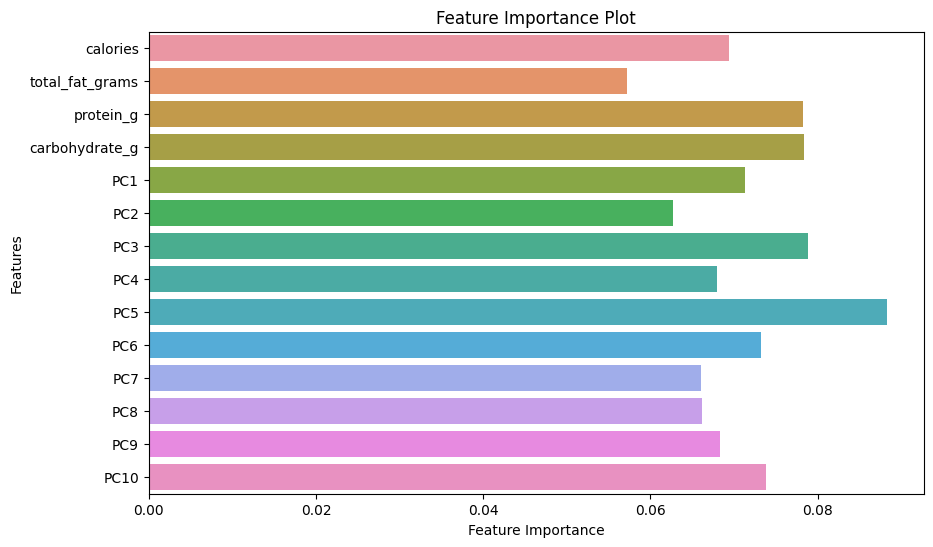

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, zero_division=0))

# Feature importance plot
feature_importance = clf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [31]:
# Feature importance
feature_importance = clf.feature_importances_
features = X.columns

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
calories: 0.0694
total_fat_grams: 0.0572
protein_g: 0.0782
carbohydrate_g: 0.0784
PC1: 0.0713
PC2: 0.0626
PC3: 0.0789
PC4: 0.0680
PC5: 0.0883
PC6: 0.0732
PC7: 0.0661
PC8: 0.0662
PC9: 0.0683
PC10: 0.0739


### Considering the top ten categories since they make a bigger representation in the dataset:
#### Category
* BEEF          967
* CEREALS       354
* PORK          336
* LAMB          295
* BEVERAGES     282
* BABYFOOD      243
* FISH          238
* CHICKEN       214
* SOUP          176
* SOUP          176
* CAMPBELL'S    156

Confusion Matrix:
            BABYFOOD  BEEF  BEVERAGES  CAMPBELL'S  CEREALS  CHICKEN  FISH  \
BABYFOOD          50     0          2           0        3        1     0   
BEEF               0   167          0           0        0        0     0   
BEVERAGES          5     0         60           0        3        0     1   
CAMPBELL'S         1     0          0          23        0        0     0   
CEREALS            0     0          0           0       72        0     0   
CHICKEN            0     0          0           0        0       34     0   
FISH               0     0          0           0        0        2    48   
LAMB               0    10          0           0        0        0     0   
PORK               0     0          0           0        0        1     2   
SOUP               1     0          1          10        0        0     0   

            LAMB  PORK  SOUP  
BABYFOOD       0     0     0  
BEEF           7     4     0  
BEVERAGES      0     0     0  
CAMPBELL'S

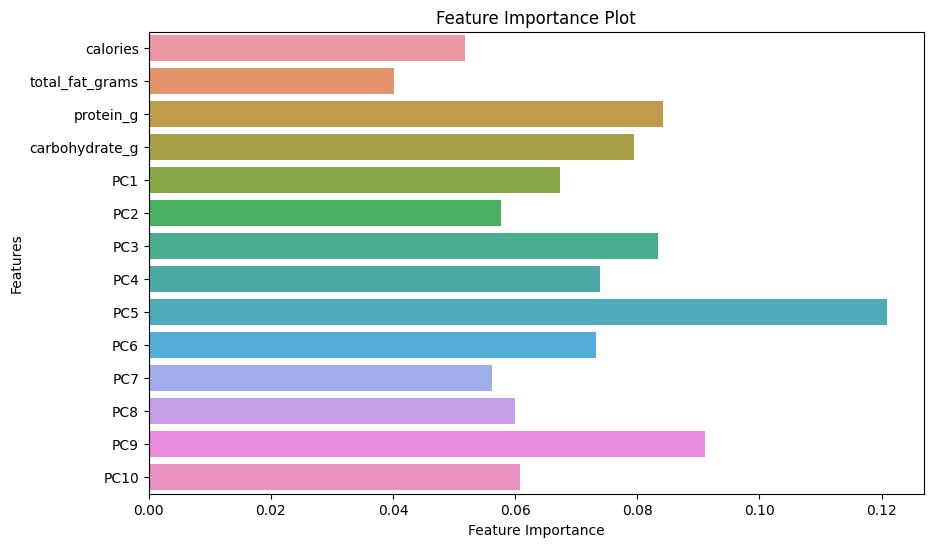

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Select the top 10 categories
top_categories = df_final['Category'].value_counts().head(10).index.tolist()
df_top_categories = df_final[df_final['Category'].isin(top_categories)]

# Drop unnecessary columns
columns_to_drop = ['name']
df_classification = df_top_categories.drop(columns=columns_to_drop)

# Split features and labels
X = df_classification.drop(columns=['Category'])
y = df_classification['Category']

# One-Hot Encoding for 'Category' Column
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(conf_matrix, index=clf.classes_, columns=clf.classes_)
print("Confusion Matrix:")
print(confusion_df)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance plot
feature_importance = clf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


#### The confusion matrix provides a detailed breakdown of the classifier's performance across different categories. Each row represents the actual category, while each column represents the predicted category. The numbers in the matrix indicate the count of samples that fall into each category.

For example, in the confusion matrix:

The classifier correctly predicted 51 samples of "BABYFOOD" (true positives) and misclassified 3 samples of "BABYFOOD" as "CEREALS" and 1 sample as "BEVERAGES".
The classifier correctly predicted 165 samples of "BEEF" and misclassified 8 samples of "BEEF" as "LAMB" and 4 samples as "PORK", and so on.
The classification report provides precision, recall, and F1-score metrics for each category. These metrics help evaluate the classifier's performance for each category individually.

Precision: The ratio of correctly predicted positive observations to the total predicted positives. A high precision indicates that the classifier has fewer false positives.
Recall: The ratio of correctly predicted positive observations to the total actual positives. A high recall indicates that the classifier has fewer false negatives.
F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall.
For example, for the category "BABYFOOD", the precision is 0.86, indicating that 86% of the samples predicted as "BABYFOOD" were actually "BABYFOOD". The recall is 0.91, indicating that 91% of the actual "BABYFOOD" samples were correctly predicted.

In [33]:
# Feature importance
feature_importance = clf.feature_importances_
features = X.columns

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
calories: 0.0518
total_fat_grams: 0.0401
protein_g: 0.0842
carbohydrate_g: 0.0794
PC1: 0.0673
PC2: 0.0577
PC3: 0.0834
PC4: 0.0739
PC5: 0.1209
PC6: 0.0732
PC7: 0.0562
PC8: 0.0600
PC9: 0.0911
PC10: 0.0608


#### The feature importance plot displays the importance of different features in predicting the categories. Features with higher importance values contribute more to the classification process. In this case, the most important features are "PC5", "protein_g", "PC9", "calories", and "PC3", suggesting that they have a significant impact on the classification model's decisions.

# Considering necessary columns based on feature importance

Confusion Matrix:
            BABYFOOD  BEEF  BEVERAGES  CAMPBELL'S  CEREALS  CHICKEN  FISH  \
BABYFOOD          47     0          4           0        2        0     2   
BEEF               0   163          0           0        0        2     0   
BEVERAGES          3     0         60           0        4        0     0   
CAMPBELL'S         1     0          0          25        0        0     0   
CEREALS            0     0          0           0       72        0     0   
CHICKEN            0     0          0           0        0       33     2   
FISH               1     0          0           0        0        1    46   
LAMB               0    18          0           0        0        0     0   
PORK               0     3          0           0        0        2     2   
SOUP               3     0          0          10        0        0     0   

            LAMB  PORK  SOUP  
BABYFOOD       0     0     1  
BEEF          10     3     0  
BEVERAGES      0     0     2  
CAMPBELL'S

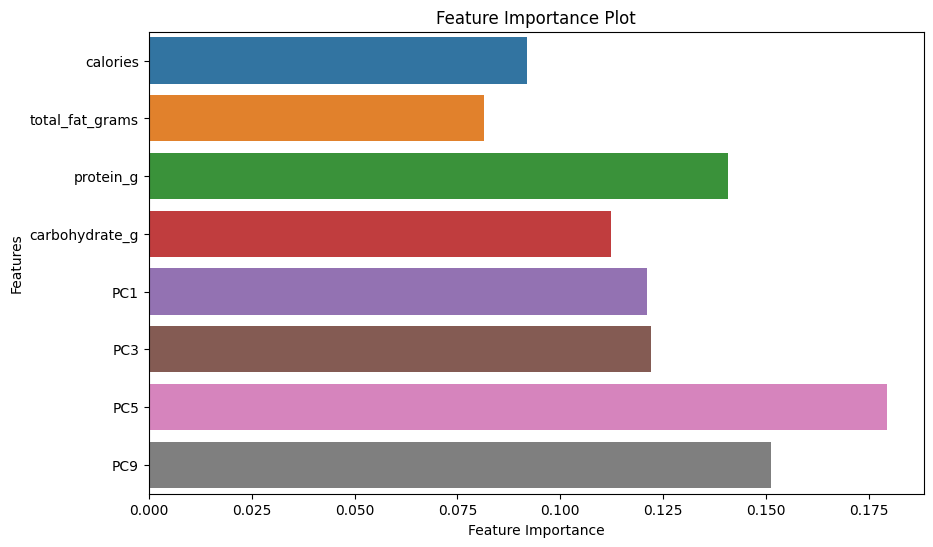

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Select the top 10 categories
top_categories = df_final['Category'].value_counts().head(10).index.tolist()
df_top_categories = df_final[df_final['Category'].isin(top_categories)]

# Define relevant columns based on feature importance
relevant_columns = ['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']

# Subset the dataframe with relevant columns
df_classification = df_top_categories[relevant_columns + ['Category']]

# Split features and labels
X = df_classification.drop(columns=['Category'])
y = df_classification['Category']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)

# Define hyperparameters grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_clf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(conf_matrix, index=best_clf.classes_, columns=best_clf.classes_)
print("Confusion Matrix:")
print(confusion_df)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(best_clf, X_scaled, y, cv=5)
print("\nCross-Validation Mean Accuracy:", cv_scores.mean())

# Feature names based on relevant_columns
features = X.columns

# Feature importance plot
feature_importance = best_clf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


In [35]:
# Print feature importance
print("Feature Importance:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")

Feature Importance:
calories: 0.0919
total_fat_grams: 0.0815
protein_g: 0.1406
carbohydrate_g: 0.1123
PC1: 0.1210
PC3: 0.1221
PC5: 0.1793
PC9: 0.1512


### Overall Interpretation:
* The model achieved an accuracy of 86%, indicating that it correctly classified 86% of the instances in the test dataset.
* Precision, recall, and F1-score vary across categories, indicating differences in the model's performance for different classes.
* Based on feature importance, it seems that nutritional components like protein, carbohydrates, and total fat grams, along with principal components PC1, PC3, PC5, and PC9, are crucial for category prediction.
* The model's performance is relatively good, but there might be room for improvement, especially for categories like LAMB, PORK, and SOUP, where precision, recall, and F1-score are lower compared to other categories.

# BUILDING A RECOMMENDER SYSTEM

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler 

In [37]:
# Selecting only the specified columns
selected_columns = ['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']

# Creating a new DataFrame with selected columns
df_selected = df[selected_columns]

In [38]:
df_selected.head()

,Category,name,calories,total_fat_grams,protein_g,carbohydrate_g,PC1,PC3,PC5,PC9
0,CORNSTARCH,Cornstarch,381,0.1,0.26,91.27,-1.647091,-0.166445,-0.128099,0.229562
1,NUTS,"Nuts, pecans",691,72.0,9.17,13.86,2.173042,-1.656052,-0.249505,0.783797
2,EGGPLANT,"Eggplant, raw",25,0.2,0.98,5.88,-1.133732,-0.497918,-0.107108,0.258346
3,TEFF,"Teff, uncooked",367,2.4,13.30,73.13,2.540549,-1.140901,-0.396015,0.466783
4,SHERBET,"Sherbet, orange",144,2.0,1.10,30.40,-1.264300,-0.601968,-0.166708,-0.311870


In [39]:
df_selected.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
calories,8789.0,2.262839e+02,169.862001,0.000000,91.000000,191.000000,337.000000,902.000000
total_fat_grams,8789.0,1.055686e+01,15.818247,0.000000,1.000000,5.100000,14.000000,100.000000
protein_g,8789.0,1.134562e+01,10.530602,0.000000,2.380000,8.020000,19.880000,88.320000
carbohydrate_g,8789.0,2.212191e+01,27.266261,0.000000,0.050000,9.340000,34.910000,100.000000
PC1,8789.0,-3.233782e-17,1.876249,-1.804922,-1.027405,-0.339661,0.254964,26.726427
PC3,8789.0,-1.293513e-17,1.384517,-12.117817,-0.576765,-0.195678,0.618969,20.441154
PC5,8789.0,-1.293513e-17,1.114798,-17.087263,-0.279589,-0.039495,0.201571,35.872656
PC9,8789.0,1.293513e-17,0.967987,-15.156597,-0.212390,0.088532,0.308883,39.447735


## Note: I WILL BE USING MAINLY CEREALS CATEGORY FOR REFERENCE.
## As we have limited data it is necessary to keep the inputs simple to obtain optimal results.

## Get the descriptions of the top similar items using Item Description

In [40]:
# Define similarity function based on other features
def calculate_similarity(item_features, target_features):
    # Calculate cosine similarity between item features and target features
    similarity_scores = cosine_similarity([item_features], [target_features])
    return similarity_scores[0][0]

# Given item description
given_item_description = "Cereals, dry, Brown Sugar, DINOSAUR EGGS, Instant Oatmeal, QUAKER"

# Assuming df_selected contains the dataset with selected columns

cat_items = df_selected[df_selected['Category'] == 'CEREALS']

# Assuming the 'name' column contains the item descriptions
# Find the index of the given item
given_item_index = df_selected[df_selected['name'] == given_item_description].index[0]

# Calculate similarity scores for each item in the DataFrame
similarities = []
for index, row in cat_items.iterrows():
    item_features = row[['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']].values
    similarity_score = calculate_similarity(item_features, df_selected.iloc[given_item_index][['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']].values)
    similarities.append((index, similarity_score))

# Sort the items based on their similarity scores
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 most similar items
top_similar_items = similarities[:6]

# Get the descriptions of the top similar items
top_similar_descriptions = [df_selected.loc[index]['name'] for index, _ in top_similar_items]

print("Top 5 similar items in the Cereals category:")
for description in top_similar_descriptions:
    print(description)


Top 5 similar items in the Cereals category:
Cereals, dry, Brown Sugar, DINOSAUR EGGS, Instant Oatmeal, QUAKER
Cereals, dry, dates and walnuts, raisins, Instant Oatmeal, QUAKER
Cereals, reduced sugar, variety of flavors, fruit and cream, Instant Oatmeal, QUAKER
Cereals ready-to-eat, POST SELECTS Maple Pecan Crunch
Cereals ready-to-eat, FAMILIA
Cereals ready-to-eat, Date & Pecan, Raisin, GREAT GRAINS, POST


In [41]:
# Get the descriptions and features of the top similar items
top_similar_descriptions = []
for index, score in top_similar_items:
    item = df_selected.loc[index]
    top_similar_descriptions.append({
        'name': item['name'],
        'Category': item['Category'],
        'calories': item['calories'],
        'total_fat_grams': item['total_fat_grams'],
        'protein_g': item['protein_g'],
        'carbohydrate_g': item['carbohydrate_g'],
        'Cosine_Similarity_Measure': score
    })

# Convert to DataFrame for display
similar_items_df = pd.DataFrame(top_similar_descriptions)

print("Top 5 similar items in the Cereals category:")
print(similar_items_df[[ 'Category','name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'Cosine_Similarity_Measure']])

Top 5 similar items in the Cereals category:
  Category                                               name  calories  \
0  CEREALS  Cereals, dry, Brown Sugar, DINOSAUR EGGS, Inst...       384   
1  CEREALS  Cereals, dry, dates and walnuts, raisins, Inst...       371   
2  CEREALS  Cereals, reduced sugar, variety of flavors, fr...       376   
3  CEREALS  Cereals ready-to-eat, POST SELECTS Maple Pecan...       413   
4  CEREALS                      Cereals ready-to-eat, FAMILIA       388   
5  CEREALS  Cereals ready-to-eat, Date & Pecan, Raisin, GR...       378   

   total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
0              7.6       8.69           73.68                   1.000000  
1              7.0       8.82           72.41                   0.999991  
2              7.5      10.16           71.57                   0.999987  
3              8.7       8.50           77.40                   0.999982  
4              6.3       9.50           73.80         

## Recommend items based on their features (Calories, Fats, Proteins, Carbohydrates)

In [42]:
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[120, 10, 20, 70]])  # Example feature vector

# Assuming df_selected is your DataFrame containing the selected columns
# ['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']

# Convert text data in the 'name' column to numerical form using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
name_features = tfidf_vectorizer.fit_transform(df_selected['name'])

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g']])

# Concatenate the numerical features with the TF-IDF vectors
combined_features = np.concatenate((scaled_features, name_features.toarray()), axis=1)

# Calculate cosine similarity between items based on features
item_similarity = cosine_similarity(combined_features)

# Content-Based Filtering: Recommend items based on their features
def recommend_items_based_on_features(features, top_n=5):
    scaled_features = scaler.transform(features)
    features_with_text = np.concatenate((scaled_features, tfidf_vectorizer.transform(['sample text']).toarray()), axis=1)  # Add a placeholder text for demonstration
    similarities = cosine_similarity(features_with_text, combined_features)
    item_indices = np.argsort(similarities[0])[::-1][1:top_n+1]
    recommended_items = df_selected.iloc[item_indices].copy()
    recommended_items['Cosine_Similarity_Measure'] = similarities[0][item_indices]
    return recommended_items

# Example: Recommend items similar to the given sample features
recommended_items = recommend_items_based_on_features(sample_features)
print("\nRecommended Items Based on Features:")
print(recommended_items[['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g','Cosine_Similarity_Measure']])


C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Recommended Items Based on Features:
     Category                                               name  calories  \
6762  CEREALS  Cereals ready-to-eat, KRETSCHMER Toasted Wheat...       200   
561       OAT                                      Oat bran, raw       246   
372     WHEAT                                  Wheat bran, crude       216   
4117    COCOA  Cocoa, processed with alkali, unsweetened, dry...       220   
1917    COCOA                     Cocoa, unsweetened, dry powder       228   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
6762              5.2      17.56           59.51                   0.802816  
561               7.0      17.30           66.22                   0.795123  
372               4.3      15.55           64.51                   0.789594  
4117             13.0      18.10           58.30                   0.789073  
1917             14.0      19.60           57.90                   0.782916  


## Recommend items based on their features and particular Category

In [43]:
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[350, 5, 15, 70]])  # Example feature vector

# Assuming df_selected is your DataFrame containing the selected columns
# ['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']

# Add "Category" as a constant value for the given example
given_item_category = "CEREALS"

# Convert text data in the 'name' column to numerical form using TF-IDF vectorization
tfidf_vectorizer_name = TfidfVectorizer(stop_words='english')
name_features = tfidf_vectorizer_name.fit_transform(df_selected['name'])

# Convert text data in the 'Category' column to numerical form using TF-IDF vectorization
tfidf_vectorizer_category = TfidfVectorizer(stop_words='english')
category_features = tfidf_vectorizer_category.fit_transform(df_selected['Category'])

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g']])

# Concatenate the numerical features with the TF-IDF vectors for 'Category' and 'name'
combined_features = np.concatenate((scaled_features, category_features.toarray(), name_features.toarray()), axis=1)

# Calculate cosine similarity between items based on features
item_similarity = cosine_similarity(combined_features)

# Content-Based Filtering: Recommend items based on their features
def recommend_items_based_on_features(features, category, top_n=5):
    scaled_features = scaler.transform(features)
    category_feature = tfidf_vectorizer_category.transform([category]).toarray()
    placeholder_text = ' '.join(tfidf_vectorizer_name.get_feature_names_out())
    name_feature = tfidf_vectorizer_name.transform([placeholder_text]).toarray()
    features_with_text = np.concatenate((scaled_features, category_feature, name_feature), axis=1)
    similarities = cosine_similarity(features_with_text, combined_features)
    item_indices = np.argsort(similarities[0])[::-1][1:top_n+1]
    recommended_items = df_selected.iloc[item_indices]
    recommended_items['Cosine_Similarity_Measure'] = similarities[0][item_indices]
    return recommended_items

# Example: Recommend items similar to the given sample features and category
recommended_items = recommend_items_based_on_features(sample_features, given_item_category)
print("\nRecommended Items Based on Features:")
print(recommended_items[[ 'Category','name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'Cosine_Similarity_Measure']])


C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Recommended Items Based on Features:
     Category                                               name  calories  \
4675  CEREALS  Cereals ready-to-eat, QUAKER Puffed Wheat, QUAKER       366   
4420  CEREALS  Cereals ready-to-eat, FIBER 7 Flakes, HEALTH V...       353   
5518  CEREALS  Cereals ready-to-eat, original spoon-size, Shr...       351   
4642  CEREALS  Cereals ready-to-eat, WEETABIX whole grain cereal       371   
4641  CEREALS  Cereals ready-to-eat, KASHI 7 Whole Grain Nuggets       356   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
4675              2.2      16.26           76.39                   0.846007  
4420              1.4      14.44           78.15                   0.845989  
5518              2.1      11.80           81.40                   0.841185  
4642              2.9      11.43           81.50                   0.840906  
4641              2.8      11.80           81.00                   0.840114  


C:\Users\nachi\AppData\Local\Temp\ipykernel_45820\4250793413.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_items['Cosine_Similarity_Measure'] = similarities[0][item_indices]


## Recommend items based on both description and features

In [44]:
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[350, 10, 10, 70]])  # Example feature vector

# Given item description
given_item_description = "Cereals, dry, Brown Sugar, DINOSAUR EGGS, Instant Oatmeal, QUAKER"

# Assuming df_selected is your DataFrame containing the selected columns
# ['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']

# Convert text data in the 'name' column to numerical form using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
name_features = tfidf_vectorizer.fit_transform(df_selected['name'])

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g']])

# Concatenate the numerical features with the TF-IDF vectors
combined_features = np.concatenate((scaled_features, name_features.toarray()), axis=1)

# Calculate cosine similarity between items based on features
item_similarity = cosine_similarity(combined_features)

# Recommend items based on both description and features
def recommend_items(item_description, features, similarity_matrix, top_n=5):
    # Find index of given item
    item_index = df_selected.index[df_selected['name'] == item_description][0]
    
    # Calculate similarities based on features
    scaled_features = scaler.transform(features)
    features_with_text = np.concatenate((scaled_features, tfidf_vectorizer.transform([item_description]).toarray()), axis=1)
    similarities = cosine_similarity(features_with_text, combined_features)
    
    # Get top similar items based on combined similarity
    combined_similarity = similarity_matrix[item_index] * similarities[0]
    item_indices = np.argsort(combined_similarity)[::-1][1:top_n+1]
    
    similar_items = df_selected.iloc[item_indices]
    similar_items['Cosine_Similarity_Measure'] = combined_similarity[item_indices]
    
    return similar_items[['Category','name',  'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'Cosine_Similarity_Measure']]

# Example: Get top 5 similar items to given item description based on both description and features
similar_items_combined = recommend_items(given_item_description, sample_features, item_similarity)
print("Top 5 Similar Items to given item description and features:")
print(similar_items_combined)


Top 5 Similar Items to given item description and features:
     Category                                               name  calories  \
5877  CEREALS  Cereals, dry, maple and brown sugar, Instant O...       368   
5452  CEREALS  Cereals, dry, fruit and cream variety, Instant...       379   
4409  CEREALS  Cereals, dry, Banana Bread, Instant Oatmeal, Q...       368   
4789  CEREALS  Cereals, dry, apples and cinnamon, Instant Oat...       366   
6127  CEREALS  Cereals, reduced sugar, Apple and Cinnamon, In...       358   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
5877              4.6       9.20           76.91                   0.866260  
5452              6.4       8.30           75.42                   0.811918  
4409              4.9       8.97           75.70                   0.810728  
4789              4.6       8.62           76.74                   0.805856  
6127              5.6      10.29           72.17                   0.799904  


C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\nachi\AppData\Local\Temp\ipykernel_45820\2156296812.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_items['Cosine_Similarity_Measure'] = combined_similarity[item_indices]


##  Recommend items based on both description and features using Glove embeddings

In [45]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load GloVe embeddings
def load_glove(vector_len):
    GloVe = f"C:/Users/nachi/Desktop/Info_Retrieval/Final_Project/archive/glove.6B.{vector_len}d.txt"
    
    embeddings_dict = {} # embeddings of all words stored in a dictionary

    with open(GloVe, 'r', encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = str(values[0])

            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    return embeddings_dict

# Tokenize text
def tokenize_text(text):
    stop_words = set(stopwords.words('english'))
    token_list = []
    text_str = re.sub(r'[^\w\s]', '', text.lower()) # drop non-alphanumeric or non-white-space
    for word in word_tokenize(text_str):
        if word not in stop_words and len(word) > 1 and len(word) < 20:
            token_list.append(word)
    return token_list

# Create embedding for text
def create_embedding(text, embeddings_dict):
    tokens = tokenize_text(text)
    embedding_dim = len(next(iter(embeddings_dict.values())))
    embedding = np.zeros(embedding_dim)
    count = 0
    for token in tokens:
        if token in embeddings_dict:
            embedding += embeddings_dict[token]
            count += 1
    if count != 0:
        embedding /= count
    return embedding

# Assuming df_selected is your DataFrame containing the selected columns
# ['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']

# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[250, 10, 10, 80]])  # Example feature vector

# Given item description
given_item_description = "Cereals, dry, Brown Sugar, DINOSAUR EGGS, Instant Oatmeal, QUAKER"

# Load GloVe embeddings
embeddings_dict = load_glove(50)  #Assuming you want embeddings of size 50

# Tokenize and create embeddings for 'Category' and 'name' columns
def create_embeddings_for_columns(data, embeddings_dict):
    category_embeddings = []
    name_embeddings = []
    
    for index, row in data.iterrows():
        category_embedding = create_embedding(row['Category'], embeddings_dict)
        name_embedding = create_embedding(row['name'], embeddings_dict)
        
        category_embeddings.append(category_embedding)
        name_embeddings.append(name_embedding)
    
    return np.array(category_embeddings), np.array(name_embeddings)

category_embeddings, name_embeddings = create_embeddings_for_columns(df_selected, embeddings_dict)

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g']])

# Concatenate the embeddings with the scaled features
combined_features = np.concatenate((category_embeddings, name_embeddings, scaled_features), axis=1)

# Calculate cosine similarity between items based on features
item_similarity = cosine_similarity(combined_features)

# Recommend items based on both description and features
def recommend_items(item_description, features, similarity_matrix, top_n=5):
    # Find index of given item
    item_index = df_selected.index[df_selected['name'] == item_description][0]
    
    # Calculate similarities based on features
    scaled_features = scaler.transform(features)
    category_embedding = create_embedding(df_selected.iloc[item_index]['Category'], embeddings_dict)
    name_embedding = create_embedding(df_selected.iloc[item_index]['name'], embeddings_dict)
    features_with_embeddings = np.concatenate((category_embedding.reshape(1, -1), name_embedding.reshape(1, -1), scaled_features), axis=1)
    similarities = cosine_similarity(features_with_embeddings, combined_features)
    
    # Get top similar items based on combined similarity
    combined_similarity = similarity_matrix[item_index] * similarities[0]
    item_indices = np.argsort(combined_similarity)[::-1][1:top_n+1]
    
    similar_items = df_selected.iloc[item_indices]
    similar_items['Cosine_Similarity_Measure'] = combined_similarity[item_indices]
    
    return similar_items[[ 'Category','name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'Cosine_Similarity_Measure']]

# Example: Get top 5 similar items to given item description based on both description and features
similar_items_combined = recommend_items(given_item_description, sample_features, item_similarity)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)


Top 5 Similar Items to the given item description based on both description and features:
     Category                                               name  calories  \
5877  CEREALS  Cereals, dry, maple and brown sugar, Instant O...       368   
5452  CEREALS  Cereals, dry, fruit and cream variety, Instant...       379   
6060  CEREALS  Cereals ready-to-eat, Maple Brown Sugar LIFE C...       373   
5827  CEREALS  Cereals, dry, maple and brown sugar, fortified...       368   
4789  CEREALS  Cereals, dry, apples and cinnamon, Instant Oat...       366   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
5877              4.6       9.20           76.91                   0.974488  
5452              6.4       8.30           75.42                   0.965101  
6060              4.1       9.17           78.86                   0.959256  
5827              4.7       9.25           76.67                   0.958728  
4789              4.6       8.62           76.74   

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\nachi\AppData\Local\Temp\ipykernel_45820\3189359472.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_items['Cosine_Similarity_Measure'] = combined_similarity[item_indices]


In [46]:
sample_features = np.array([[150, 5, 20, 5]])  # Example feature vector
given_item_description = "Beef, raw, select, separable lean and fat, chuck for stew"

similar_items_combined = recommend_items(given_item_description, sample_features, item_similarity)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)


Top 5 Similar Items to the given item description based on both description and features:
     Category                                               name  calories  \
4885     BEEF  Beef, raw, choice, separable lean and fat, chu...       130   
5711     BEEF  Beef, raw, all grades, separable lean and fat,...       128   
7610     BEEF  Beef, raw, select, trimmed to 0" fat, separabl...       122   
6837     BEEF  Beef, raw, select, trimmed to 0" fat, separabl...       143   
6968     BEEF  Beef, raw, choice, trimmed to 1/8" fat, separa...       139   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
4885              4.8      21.64            0.12                   0.995010  
5711              4.5      21.75            0.16                   0.989031  
7610              4.2      21.05            0.00                   0.976133  
6837              6.5      21.28            0.00                   0.976010  
6968              5.1      21.96            0.00   

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\nachi\AppData\Local\Temp\ipykernel_45820\3189359472.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_items['Cosine_Similarity_Measure'] = combined_similarity[item_indices]


In [47]:
sample_features = np.array([[50, 5, 5, 15]])  # Example feature vector
given_item_description = "Beverages, Citrus,  Energy drink"

similar_items_combined = recommend_items(given_item_description, sample_features, item_similarity)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)


Top 5 Similar Items to the given item description based on both description and features:
       Category                                               name  calories  \
4053  BEVERAGES      Beverages, citrus flavor, VAULT, Energy drink        49   
6634  BEVERAGES  Beverages, Cranberry Energy Juice Drink, Cran-...        15   
7276  BEVERAGES  Beverages, Energy Drink with carbonated water ...        62   
1653  BEVERAGES                  Beverages, ROCKSTAR, Energy drink        58   
885   BEVERAGES                       Beverages, AMP, Energy drink        46   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
4053              0.0       0.00           12.99                   0.962995  
6634              0.0       0.00            3.75                   0.955860  
7276              0.0       0.42           15.00                   0.953360  
1653              0.2       0.34           12.70                   0.952143  
885               0.1       0.25       

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\nachi\AppData\Local\Temp\ipykernel_45820\3189359472.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_items['Cosine_Similarity_Measure'] = combined_similarity[item_indices]


## The code has been modified to hold any item description (Final Model)

## Mention what you want to eat and the macros (Calories, Proteins, Fats and Carbohydrates) you want, the model will suggest its top recommendations using cosine similarity

In [55]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load GloVe embeddings
def load_glove(vector_len):
    GloVe = f"C:/Users/nachi/Desktop/Info_Retrieval/Final_Project/archive/glove.6B.{vector_len}d.txt"
    
    embeddings_dict = {} # embeddings of all words stored in a dictionary

    with open(GloVe, 'r', encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = str(values[0])

            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    return embeddings_dict

# Tokenize text
def tokenize_text(text):
    stop_words = set(stopwords.words('english'))
    token_list = []
    text_str = re.sub(r'[^\w\s]', '', text.lower()) # drop non-alphanumeric or non-white-space
    for word in word_tokenize(text_str):
        if word not in stop_words and len(word) > 1 and len(word) < 20:
            token_list.append(word)
    return token_list

# Create embedding for text
def create_embedding(text, embeddings_dict):
    tokens = tokenize_text(text)
    embedding_dim = len(next(iter(embeddings_dict.values())))
    embedding = np.zeros(embedding_dim)
    count = 0
    for token in tokens:
        if token in embeddings_dict:
            embedding += embeddings_dict[token]
            count += 1
    if count != 0:
        embedding /= count
    return embedding

# Load GloVe embeddings
embeddings_dict = load_glove(50)  # Assuming you want embeddings of size 50

# Assuming df_selected is your DataFrame containing the selected columns
# ['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']

# Tokenize and create embeddings for 'Category' and 'name' columns
def create_embeddings_for_columns(data, embeddings_dict):
    category_embeddings = []
    name_embeddings = []
    
    for index, row in data.iterrows():
        category_embedding = create_embedding(row['Category'], embeddings_dict)
        name_embedding = create_embedding(row['name'], embeddings_dict)
        
        category_embeddings.append(category_embedding)
        name_embeddings.append(name_embedding)
    
    return np.array(category_embeddings), np.array(name_embeddings)

category_embeddings, name_embeddings = create_embeddings_for_columns(df_selected, embeddings_dict)

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g']])

# Concatenate the embeddings with the scaled features
combined_features = np.concatenate((category_embeddings, name_embeddings, scaled_features), axis=1)

# Recommend items based on both description and features
def recommend_items(category, item_description, features, top_n=5):
    # Calculate embeddings for the input description and category
    category_embedding = create_embedding(category, embeddings_dict)
    name_embedding = create_embedding(item_description, embeddings_dict)
    
    # Standardize the input features
    scaled_features = scaler.transform(features)
    
    # Concatenate the input embeddings with the scaled features
    input_features_with_embeddings = np.concatenate((category_embedding.reshape(1, -1), name_embedding.reshape(1, -1), scaled_features), axis=1)
    
    # Calculate similarity with all items
    similarities = cosine_similarity(input_features_with_embeddings, combined_features)
    
    # Get top similar items based on combined similarity
    item_indices = np.argsort(similarities[0])[::-1][:top_n]
    
    similar_items = df_selected.iloc[item_indices].copy()
    similar_items['Cosine_Similarity_Measure'] = similarities[0][item_indices]
    
    return similar_items[['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'Cosine_Similarity_Measure']]

# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[250, 10, 10, 80]])  # Example feature vector

# Example: Input item description and category
given_item_description = "cereals chocolate"
given_item_category = "CEREALS"

# Get top 5 similar items to the input description based on both description and features
similar_items_combined = recommend_items(given_item_category, given_item_description, sample_features, top_n=5)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)


Top 5 Similar Items to the given item description based on both description and features:
     Category                                               name  calories  \
5274  CEREALS  Cereals ready-to-eat, KELLOGG'S KRAVE chocolat...       397   
5509  CEREALS  Cereals ready-to-eat, CHOCOLATE MARSHMALLOW MA...       392   
2580  CEREALS               Cereals, dry, chocolate, MALT-O-MEAL       363   
5731  CEREALS  Cereals ready-to-eat, KELLOGG'S KRAVE double c...       397   
4807  CEREALS  Cereals ready-to-eat, KELLOGG'S SPECIAL K Choc...       375   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
5274             11.0       7.00           76.10                   0.970961  
5509              3.7       3.50           88.18                   0.970600  
2580              0.8      10.60           79.55                   0.968713  
5731             11.0       7.10           75.90                   0.958891  
4807              5.1       7.59           81.50   

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[350, 30, 20, 10]])  # Example feature vector
# Example: Input item description and category
given_item_description = "sausage grill"
given_item_category = "BEEF"

# Get top 5 similar items to the input description based on both description and features
similar_items_combined = recommend_items(given_item_category, given_item_description, sample_features, top_n=5)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)

Top 5 Similar Items to the given item description based on both description and features:
     Category                                               name  calories  \
1157     BEEF                           Beef sausage, pre-cooked       405   
906      BEEF                        Beef sausage, cooked, fresh       332   
6131     BEEF  Beef, raw, formed and thinly sliced, chopped, ...       309   
2521     BEEF               Beef, smoked, cooked, sausage, cured       312   
3807     BEEF     Beef, broiled, cooked, frozen, patties, ground       295   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
1157             38.0      15.50            0.03                   0.934814  
906              28.0      18.21            0.35                   0.933010  
6131             27.0      16.50            0.00                   0.924575  
2521             27.0      14.11            2.42                   0.923367  
3807             22.0      23.05            0.00   

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[300, 20, 30, 10]])  # Example feature vector
# Example: Input item description and category
given_item_description = "bbq wings"
given_item_category = "CHICKEN"

# Get top 5 similar items to the input description based on both description and features
similar_items_combined = recommend_items(given_item_category, given_item_description, sample_features, top_n=5)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)

Top 5 Similar Items to the given item description based on both description and features:
     Category                                               name  calories  \
5426  CHICKEN  Chicken, wing meat and skin, BBQ, rotisserie, ...       257   
7978  CHICKEN  Chicken, original seasoning, rotisserie, cooke...       266   
4565  CHICKEN  Chicken, meat only, wing, BBQ, rotisserie, bro...       184   
8152  CHICKEN  Chicken, original seasoning, rotisserie, cooke...       197   
6392  CHICKEN  Chicken, heated (microwave), barbecue flavored...       248   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
5426             18.0      23.42            0.60                   0.934626  
7978             19.0      24.34            0.04                   0.928676  
4565              7.8      28.34            0.54                   0.924228  
8152              9.5      27.69            0.00                   0.921601  
6392             14.0      25.34            3.84   

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [66]:
# Lets give a complex input and test its potential
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[300, 5, 25, 50]])  # Example feature vector
# Example: Input item description and category
given_item_description = "strawberry bannana chocolate protein smoothie"
given_item_category = "BEVERAGES"

# Get top 5 similar items to the input description based on both description and features
similar_items_combined = recommend_items(given_item_category, given_item_description, sample_features, top_n=5)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)

Top 5 Similar Items to the given item description based on both description and features:
       Category                                               name  calories  \
7820  BEVERAGES  Beverages, powder, with low-calorie sweeteners...       329   
3702  BEVERAGES    Beverages, KELLOGG'S SPECIAL K20 protein powder       380   
7048  BEVERAGES  Beverages,, 3-2-1 Plan, whey powder, high prot...       368   
2852  BEVERAGES       Beverages, powder, unsweetened, instant, tea       315   
2879  BEVERAGES        Beverages, no sugar added, chocolate powder       373   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
7820              2.6      25.00           51.40                   0.931889  
3702              0.6      35.20           58.40                   0.921974  
7048             12.0      27.87           50.00                   0.918554  
2852              0.0      20.21           58.66                   0.906387  
2879              9.1       9.09       

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
print("Top 5 Similar Items to the given item description based on both description and features:")
for index, item in similar_items_combined.iterrows():
    print("\nItem", index + 1)
    print("Category:", item['Category'])
    print("Name:", item['name'])
    print("Calories:", item['calories'])

Top 5 Similar Items to the given item description based on both description and features:

Item 7821
Category: BEVERAGES
Name: Beverages, powder, with low-calorie sweeteners, reduced calorie, chocolate, Dairy drink mix
Calories: 329

Item 3703
Category: BEVERAGES
Name: Beverages, KELLOGG'S SPECIAL K20 protein powder
Calories: 380

Item 7049
Category: BEVERAGES
Name: Beverages,, 3-2-1 Plan, whey powder, high protein, SLIMFAST Shake Mix, UNILEVER
Calories: 368

Item 2853
Category: BEVERAGES
Name: Beverages, powder, unsweetened, instant, tea
Calories: 315

Item 2880
Category: BEVERAGES
Name: Beverages, no sugar added, chocolate powder
Calories: 373


In [69]:
# Lets give a complex input and test its potential
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[450, 20, 20, 60]])  # Example feature vector
# Example: Input item description and category
given_item_description = "chicken noodle soup"
given_item_category = "SOUP"

# Get top 5 similar items to the input description based on both description and features
similar_items_combined = recommend_items(given_item_category, given_item_description, sample_features, top_n=5)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)

Top 5 Similar Items to the given item description based on both description and features:
     Category                                     name  calories  \
2110     SOUP  Soup, dry, chicken flavor, ramen noodle       439   
1999     SOUP           Soup, mix, dry, chicken noodle       377   
2487     SOUP     Soup, dry, beef flavor, ramen noodle       441   
2665     SOUP      Soup, dry, any flavor, ramen noodle       440   
2484     SOUP     Soup, dry, chicken broth or bouillon       267   

      total_fat_grams  protein_g  carbohydrate_g  Cosine_Similarity_Measure  
2110             18.0      10.22           60.23                   0.970824  
1999              6.5      15.42           62.32                   0.964133  
2487             18.0      10.06           60.34                   0.963440  
2665             18.0      10.17           60.26                   0.955954  
2484             14.0      16.66           18.01                   0.915930  


C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
print("Top 5 Similar Items to the given item description based on both description and features:")
for index, item in similar_items_combined.iterrows():
    print("\nItem", index + 1)
    print("Category:", item['Category'])
    print("Name:", item['name'])
    print("Calories:", item['calories'])

Top 5 Similar Items to the given item description based on both description and features:

Item 2111
Category: SOUP
Name: Soup, dry, chicken flavor, ramen noodle
Calories: 439

Item 2000
Category: SOUP
Name: Soup, mix, dry, chicken noodle
Calories: 377

Item 2488
Category: SOUP
Name: Soup, dry, beef flavor, ramen noodle
Calories: 441

Item 2666
Category: SOUP
Name: Soup, dry, any flavor, ramen noodle
Calories: 440

Item 2485
Category: SOUP
Name: Soup, dry, chicken broth or bouillon
Calories: 267


## Mention what you want to eat and the macros (Calories, Proteins, Fats and Carbohydrates) you want, the model will suggest its top recommendations using Word Mover's Distance

In [51]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from gensim.models import KeyedVectors

# Load GloVe embeddings using gensim
def load_glove(vector_len):
    glove_file = f"C:/Users/nachi/Desktop/Info_Retrieval/Final_Project/archive/glove.6B.{vector_len}d.txt"
    embeddings_dict = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)
    return embeddings_dict

# Tokenize text
def tokenize_text(text):
    stop_words = set(stopwords.words('english'))
    token_list = []
    text_str = re.sub(r'[^\w\s]', '', text.lower())  # drop non-alphanumeric or non-white-space
    for word in word_tokenize(text_str):
        if word not in stop_words and len(word) > 1 and len(word) < 20:
            token_list.append(word)
    return token_list

# Create embedding for text using average embedding of tokens
def create_embedding(text, embeddings_dict):
    tokens = tokenize_text(text)
    embedding_dim = embeddings_dict.vector_size
    embedding = np.zeros(embedding_dim)
    count = 0
    for token in tokens:
        if token in embeddings_dict:
            embedding += embeddings_dict[token]
            count += 1
    if count != 0:
        embedding /= count
    return embedding

# Load GloVe embeddings
embeddings_dict = load_glove(50)  # Assuming you want embeddings of size 50

# Assuming df_selected is your DataFrame containing the selected columns
# ['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'PC1', 'PC3', 'PC5', 'PC9']

# Tokenize and create embeddings for 'Category' and 'name' columns
def create_embeddings_for_columns(data, embeddings_dict):
    category_embeddings = []
    name_embeddings = []
    
    for index, row in data.iterrows():
        category_embedding = create_embedding(row['Category'], embeddings_dict)
        name_embedding = create_embedding(row['name'], embeddings_dict)
        
        category_embeddings.append(category_embedding)
        name_embeddings.append(name_embedding)
    
    return np.array(category_embeddings), np.array(name_embeddings)

category_embeddings, name_embeddings = create_embeddings_for_columns(df_selected, embeddings_dict)

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[['calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g']])

# Concatenate the embeddings with the scaled features
combined_features = np.concatenate((category_embeddings, name_embeddings, scaled_features), axis=1)

# Recommend items based on both description and features
def recommend_items(category, item_description, features, top_n=5):
    # Calculate embeddings for the input description and category
    category_embedding = create_embedding(category, embeddings_dict)
    name_embedding = create_embedding(item_description, embeddings_dict)
    
    # Standardize the input features
    scaled_features = scaler.transform(features)
    
    # Concatenate the input embeddings with the scaled features
    input_features_with_embeddings = np.concatenate((category_embedding.reshape(1, -1), name_embedding.reshape(1, -1), scaled_features), axis=1)
    
    # Calculate WMD between the input and all items
    item_wmds = []
    for i in range(combined_features.shape[0]):
        item_wmd = embeddings_dict.wmdistance(tokenize_text(df_selected.iloc[i]['name']), tokenize_text(item_description))
        item_wmds.append(item_wmd)
    
    # Sort items by WMD (lower is better)
    item_indices = np.argsort(item_wmds)[:top_n]
    
    similar_items = df_selected.iloc[item_indices].copy()
    similar_items['Word_Movers_Distance'] = np.array(item_wmds)[item_indices]
    
    return similar_items[['Category', 'name', 'calories', 'total_fat_grams', 'protein_g', 'carbohydrate_g', 'Word_Movers_Distance']]

# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[250, 10, 10, 80]])  # Example feature vector

# Example: Input item description and category
given_item_description = "cereals chocolate"
given_item_category = "CEREALS"

# Get top 5 similar items to the input description based on both description and features
similar_items_combined = recommend_items(given_item_category, given_item_description, sample_features, top_n=5)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)


C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Top 5 Similar Items to the given item description based on both description and features:
      Category                                               name  calories  \
5509   CEREALS  Cereals ready-to-eat, CHOCOLATE MARSHMALLOW MA...       392   
2580   CEREALS               Cereals, dry, chocolate, MALT-O-MEAL       363   
4110   CEREALS  Cereals ready-to-eat, MARSHMALLOW MATEYS, MALT...       387   
1568  PUDDINGS                  Puddings, ready-to-eat, chocolate       142   
4323   CEREALS  Cereals ready-to-eat, Fruity DYNO-BITES, MALT-...       404   

      total_fat_grams  protein_g  carbohydrate_g  Word_Movers_Distance  
5509              3.7       3.50           88.18              0.327481  
2580              0.8      10.60           79.55              0.338609  
4110              3.5       6.94           82.77              0.404274  
1568              4.6       2.09           23.01              0.435602  
4323              3.2       3.90           90.10              0.455845

In [52]:
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[250, 20, 20, 20]])  # Example feature vector
# Example: Input item description and category
given_item_description = "sausage"
given_item_category = "BEEF"

# Get top 5 similar items to the input description based on both description and features
similar_items_combined = recommend_items(given_item_category, given_item_description, sample_features, top_n=5)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Top 5 Similar Items to the given item description based on both description and features:
         Category                                         name  calories  \
2901         PORK  Pork sausage, pan-fried, cooked, link/patty       325   
1928   MCDONALD'S               McDONALD'S, Sausage McGRIDDLES       312   
1157         BEEF                     Beef sausage, pre-cooked       405   
339       SAUSAGE                            Sausage, meatless       255   
2016  CHICK-FIL-A                CHICK-FIL-A, chicken sandwich       249   

      total_fat_grams  protein_g  carbohydrate_g  Word_Movers_Distance  
2901             27.0      18.53            1.42              0.442248  
1928             18.0       8.41           31.25              0.492975  
1157             38.0      15.50            0.03              0.525808  
339              18.0      20.28            8.09              0.527457  
2016             11.0      16.28           20.89              0.533605  


In [53]:
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[300, 20, 30, 10]])  # Example feature vector
# Example: Input item description and category
given_item_description = "bbq wings"
given_item_category = "CHICKEN"

# Get top 5 similar items to the input description based on both description and features
similar_items_combined = recommend_items(given_item_category, given_item_description, sample_features, top_n=5)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Top 5 Similar Items to the given item description based on both description and features:
     Category                                               name  calories  \
4565  CHICKEN  Chicken, meat only, wing, BBQ, rotisserie, bro...       184   
2183  CHICKEN            Chicken, skin, BBQ, rotisserie, broiler       378   
5426  CHICKEN  Chicken, wing meat and skin, BBQ, rotisserie, ...       257   
3432  CHICKEN  Chicken, back meat only, BBQ, rotisserie, broiler       212   
4148  CHICKEN  Chicken, back meat and skin, BBQ, rotisserie, ...       251   

      total_fat_grams  protein_g  carbohydrate_g  Word_Movers_Distance  
4565              7.8      28.34            0.54              0.859617  
2183             35.0      15.19            0.70              0.859783  
5426             18.0      23.42            0.60              0.871891  
3432             14.0      21.85            0.31              0.905536  
4148             19.0      20.29            0.40              0.911250  


In [54]:
# Sample feature space including only 'calories', 'protein_g', 'total_fat_grams', 'carbohydrate_g'
sample_features = np.array([[300, 20, 30, 10]])  # Example feature vector
# Example: Input item description and category
given_item_description = "Beer "
given_item_category = "BEVERAGES"

# Get top 5 similar items to the input description based on both description and features
similar_items_combined = recommend_items(given_item_category, given_item_description, sample_features, top_n=5)
print("Top 5 Similar Items to the given item description based on both description and features:")
print(similar_items_combined)

C:\Users\nachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Top 5 Similar Items to the given item description based on both description and features:
       Category                                               name  calories  \
1842  ALCOHOLIC                    Alcoholic beverage, light, beer        29   
2272  ALCOHOLIC             Alcoholic beverage, all, regular, beer        43   
1703  BEVERAGES                   Beverages, root beer, carbonated        41   
5035  BEVERAGES  Beverages, restaurant-prepared, espresso, brew...         9   
3167       MALT         Malt beverage, includes non-alcoholic beer        37   

      total_fat_grams  protein_g  carbohydrate_g  Word_Movers_Distance  
1842              0.0       0.24            1.64              0.691624  
2272              0.0       0.46            3.55              0.709006  
1703              0.0       0.00           10.60              0.709148  
5035              0.2       0.12            1.67              0.710726  
3167              0.1       0.21            8.05              0.